# Introduction

Here we check the sPHENIX field map and separate the in-steel field from the outside

In [1]:
# imports to write dynamic markdown contents
import os
from IPython.display import display, Markdown, Latex
from IPython.display import HTML

## Initialization

In [2]:
# turn off/on code for the result HTML page

display(Markdown('*For the result HTML page:* '))
    
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

*For the result HTML page:* 

In [3]:
import ROOT

OFFLINE_MAIN = os.getenv("OFFLINE_MAIN")
if OFFLINE_MAIN is not None:
    display(Markdown(f"via sPHENIX software distribution at `{OFFLINE_MAIN}`"))

Welcome to JupyROOT 6.24/06


via sPHENIX software distribution at `/cvmfs/sphenix.sdcc.bnl.gov/gcc-8.3/release/release_new/new.1`

In [4]:
import uproot
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.style.use('seaborn-white')

import numpy as np

from os.path import exists


# Before 2022: 2D Field map export

In [5]:
MapFile2D = '/cvmfs/eic.opensciencegrid.org/ecce/gcc-8.3/release/release_prop/prop.7/share/calibrations//Field/Map/sPHENIX.2d.root'

# 2D field map scaling on its working point
# https://github.com/ECCE-EIC/macros/blob/prop.7.0/detectors/EICDetector/Fun4All_G4_EICDetector.C#L460 
magfield_2D_rescale = -1.4 / 1.5;

In [6]:
display(Markdown(f'2D field map from `{MapFile2D}`'))

2D field map from `/cvmfs/eic.opensciencegrid.org/ecce/gcc-8.3/release/release_prop/prop.7/share/calibrations//Field/Map/sPHENIX.2d.root`

In [7]:
file = uproot.open(MapFile2D)

In [8]:
file.keys()

['fieldmap;1', 'h1;1']

In [9]:
file['fieldmap'].keys()

['r', 'z', 'br', 'bz']

In [10]:
df_fieldmap = file['fieldmap'].arrays(library="pd")

df_fieldmap['br'] = df_fieldmap['br'].apply(lambda x: x * magfield_2D_rescale)
df_fieldmap['bz'] = df_fieldmap['bz'].apply(lambda x: x * magfield_2D_rescale)

In [11]:
df_fieldmap

,r,z,br,bz
0,300.0,400.0,0.004610,-0.002614
1,298.0,400.0,0.004837,-0.002521
2,296.0,400.0,0.005066,-0.002391
3,294.0,400.0,0.005322,-0.002253
4,292.0,400.0,0.005585,-0.002108
...,...,...,...,...
60546,8.0,-400.0,-0.002663,0.007943
60547,6.0,-400.0,-0.002007,0.008361
60548,4.0,-400.0,-0.001348,0.008561
60549,2.0,-400.0,-0.000696,0.008769


In [12]:

X=df_fieldmap['z'].values
Y=df_fieldmap['r'].values
Z=df_fieldmap.apply(lambda x: np.sqrt(x['br']*x['br'] + x['bz']*x['bz']), axis=1).values

limits =  np.arange(0,2.5,.1);


## Check field map plot

And Hcal is treated as a homogenious material in 2D field map, which has to be modified via our HCal field after-burner to produce 3D field that match Hcal sample structure. 

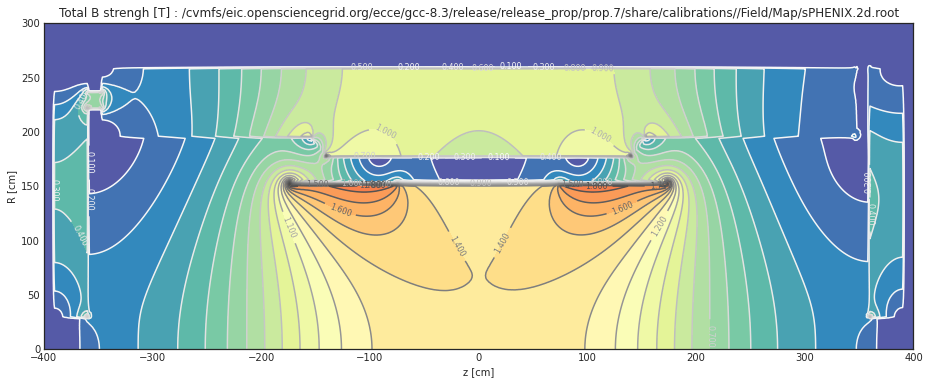

In [13]:
fig, ax = plt.subplots(figsize=(16,6))
ax.set_aspect('equal')
ax.tricontourf(X,Y,Z,limits, cmap='Spectral_r') 
contours = ax.tricontour(X,Y,Z, limits)
ax.clabel(contours, inline=True, fontsize=8)

ax.set_xlabel('z [cm]')
ax.set_ylabel('R [cm]')
ax.set_title("Total B strengh [T] : " + MapFile2D)

fig.show()

In [14]:
df_fieldmap.to_csv('sPHENIX.2d.csv');

# Since 2022: 3D field map in simulation

In [15]:
MapFile3D = '/cvmfs/eic.opensciencegrid.org/ecce/gcc-8.3/release/release_prop/prop.7/share/calibrations//Field/Map/sphenix3dbigmapxyz.root'

In [16]:
display(Markdown(f'3D field map from `{MapFile3D}`'))

3D field map from `/cvmfs/eic.opensciencegrid.org/ecce/gcc-8.3/release/release_prop/prop.7/share/calibrations//Field/Map/sphenix3dbigmapxyz.root`

In [17]:
file = uproot.open(MapFile3D)

In [18]:
df_fieldmap = file['fieldmap'].arrays(library="pd")

In [19]:
df_fieldmap

,x,y,z,bx,by,bz,hz
0,-270.0,-270.0,-330.0,0.001434,0.001430,-0.002762,-0.002762
1,-270.0,-270.0,-328.0,0.001390,0.001386,-0.002795,-0.002795
2,-270.0,-270.0,-326.0,0.001345,0.001341,-0.002826,-0.002826
3,-270.0,-270.0,-324.0,0.001299,0.001295,-0.002855,-0.002855
4,-270.0,-270.0,-322.0,0.001252,0.001248,-0.002881,-0.002881
...,...,...,...,...,...,...,...
24308966,270.0,270.0,322.0,0.001292,0.001240,-0.003005,-0.003005
24308967,270.0,270.0,324.0,0.001341,0.001289,-0.002977,-0.002977
24308968,270.0,270.0,326.0,0.001389,0.001338,-0.002947,-0.002947
24308969,270.0,270.0,328.0,0.001436,0.001385,-0.002915,-0.002915


## Check field map plot

### `x=0` plane

Plotted both in $|B|$ and $B_z$

In [20]:
df_fieldmap_yz = df_fieldmap[df_fieldmap['x'] == 0]

In [21]:
df_fieldmap_yz

,x,y,z,bx,by,bz,hz
12109635,0.0,-270.0,-330.0,0.000137,0.009904,-0.092114,-0.092114
12109636,0.0,-270.0,-328.0,0.000332,0.005110,-0.095648,-0.095648
12109637,0.0,-270.0,-326.0,0.000301,0.000888,-0.091804,-0.091804
12109638,0.0,-270.0,-324.0,0.000270,-0.004503,-0.089257,-0.089257
12109639,0.0,-270.0,-322.0,0.000258,-0.010979,-0.088455,-0.088455
...,...,...,...,...,...,...,...
12199331,0.0,270.0,322.0,0.000173,-0.010986,-0.090137,-0.090137
12199332,0.0,270.0,324.0,0.000142,-0.004388,-0.090975,-0.090975
12199333,0.0,270.0,326.0,0.000133,0.001115,-0.093587,-0.093587
12199334,0.0,270.0,328.0,0.000149,0.005438,-0.097469,-0.097469


In [22]:

X=df_fieldmap_yz['z'].values
Y=df_fieldmap_yz['y'].values
Z=df_fieldmap_yz.apply(lambda x: np.sqrt(x['bx']*x['bx'] + x['by']*x['by'] + x['bz']*x['bz']), axis=1).values

limits =  np.arange(0,2.5,.1);


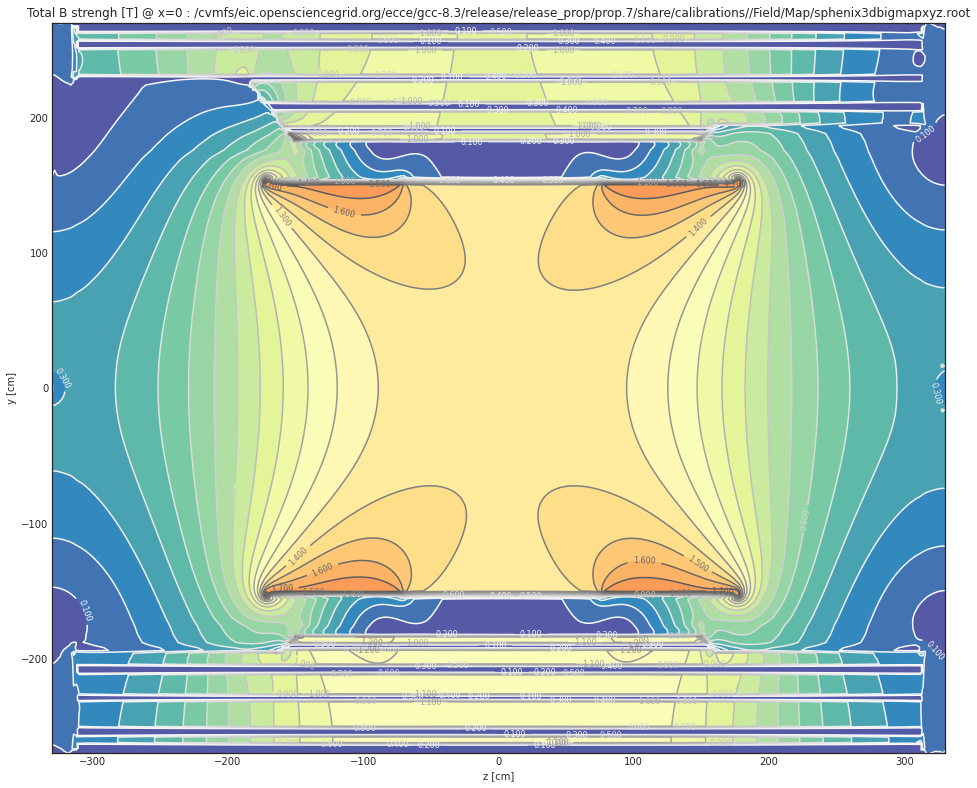

In [23]:
fig, ax = plt.subplots(figsize=(16,16))
ax.set_aspect('equal')
ax.tricontourf(X,Y,Z,limits, cmap='Spectral_r') 
contours = ax.tricontour(X,Y,Z, limits)
ax.clabel(contours, inline=True, fontsize=8)

ax.set_xlabel('z [cm]')
ax.set_ylabel('y [cm]')
ax.set_title("Total B strengh [T] @ x=0 : " + MapFile3D)

fig.show()

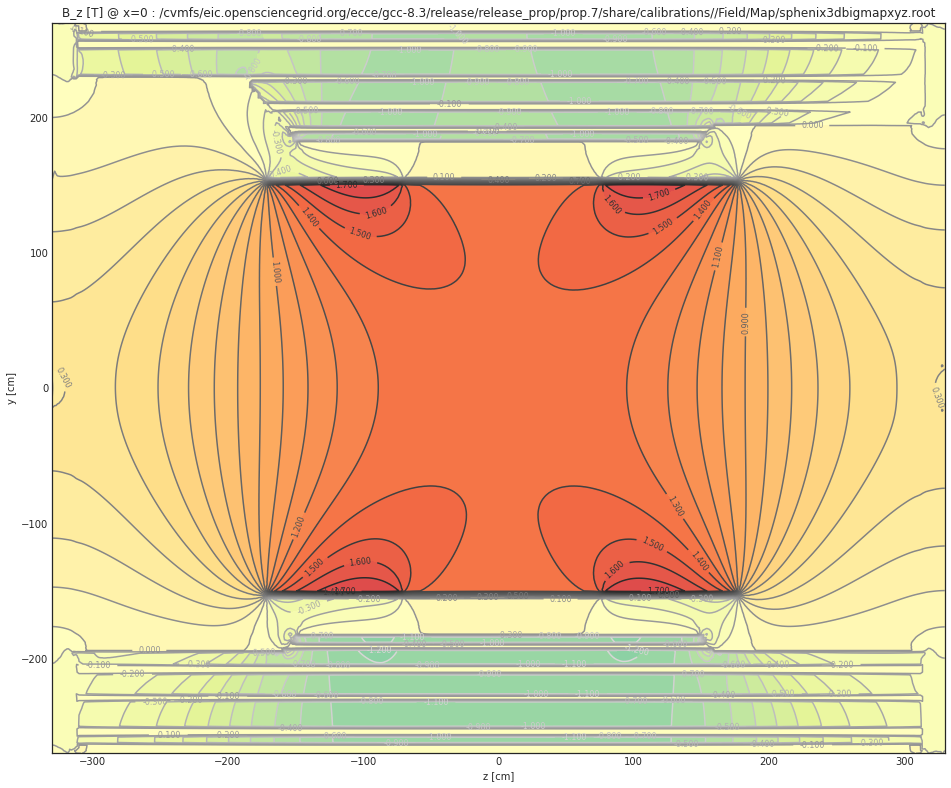

In [24]:
limits =  np.arange(-2.5,2.5,.1);

fig, ax = plt.subplots(figsize=(16,16))
ax.set_aspect('equal')
ax.tricontourf(X,Y,df_fieldmap_yz['bz'].values,limits, cmap='Spectral_r') 
contours = ax.tricontour(X,Y,df_fieldmap_yz['bz'].values, limits)
ax.clabel(contours, inline=True, fontsize=8)

ax.set_xlabel('z [cm]')
ax.set_ylabel('y [cm]')
ax.set_title("B_z [T] @ x=0 : " + MapFile3D)

fig.show()

# In steel vs out of steel

Next let's see whether there are sufficient space point around HCal to tell field from in steel vs outside. The stat for field point in the gap is low given the small gap, and the field points in the HCal randomly points to in the steel and outside the steel. Given G4 field map use a 3D interpolation that assuming smooth field distribution, this leads to improper field map in HCal.

In [25]:
df_fieldmap_xy = df_fieldmap[df_fieldmap['z'] == 0]

df_fieldmap_xy.insert(loc=1, column='B_tot', value=df_fieldmap_xy.apply(lambda x: np.sqrt(x['bx']*x['bx'] + x['by']*x['by'] + x['bz']*x['bz']), axis=1))
df_fieldmap_xy.insert(loc=1, column='phi_fmod', value=df_fieldmap_xy.apply(
    lambda x: np.fmod(np.arctan2(x['y'], x['x']) + np.pi + 2.*np.pi/64, 2.*np.pi/32.) - 2.*np.pi/64, axis=1))
df_fieldmap_xy.insert(loc=1, column='R', value=df_fieldmap_xy.apply(
    lambda x: np.sqrt(x['x']*x['x'] + x['y']*x['y'])
    , axis=1))
df_fieldmap_xy.insert(loc=1, column='X_fold', value=df_fieldmap_xy.apply(lambda x: np.cos(x['phi_fmod'])*x['R'], axis=1))
df_fieldmap_xy.insert(loc=1, column='Y_fold', value=df_fieldmap_xy.apply(lambda x: np.sin(x['phi_fmod'])*x['R'], axis=1))


In [26]:
X=df_fieldmap_xy['x'].values
Y=df_fieldmap_xy['y'].values
Z=df_fieldmap_xy.apply(lambda x: np.sqrt(x['bx']*x['bx'] + x['by']*x['by'] + x['bz']*x['bz']), axis=1).values

The field in HCal is definitely sparse, if looking at the whole transverse cut away: 

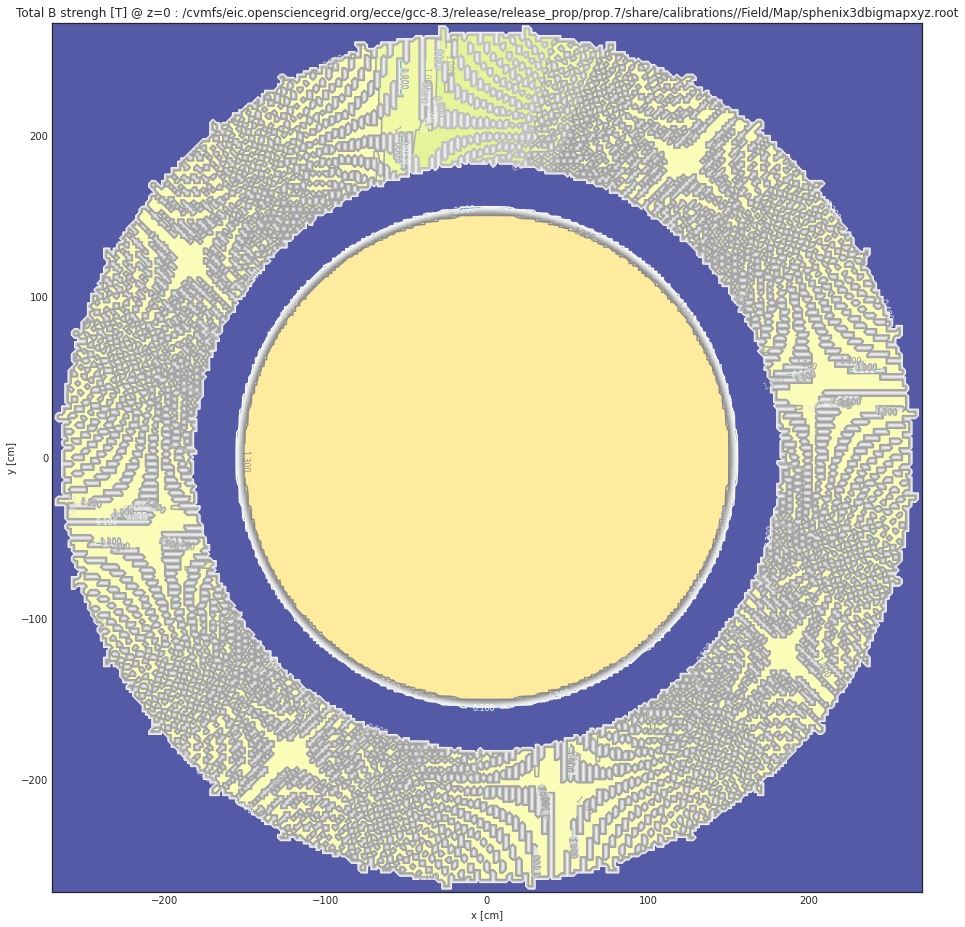

In [27]:
limits =  np.arange(0,2.5,.1);

fig, ax = plt.subplots(figsize=(16,16))
ax.set_aspect('equal')
ax.tricontourf(X,Y,Z,limits, cmap='Spectral_r') 
contours = ax.tricontour(X,Y,Z, limits)
ax.clabel(contours, inline=True, fontsize=8)

ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
ax.set_title("Total B strengh [T] @ z=0 : " + MapFile3D)

fig.show()

## Check: folding data azimuthally to one sector

Next trick is for `z=0` plane, we can fold the HCal azimuthally 64 times to look at one sector. Then we have much better sampling of the space point

In [28]:



limits =  np.arange(0,2.5,.1);

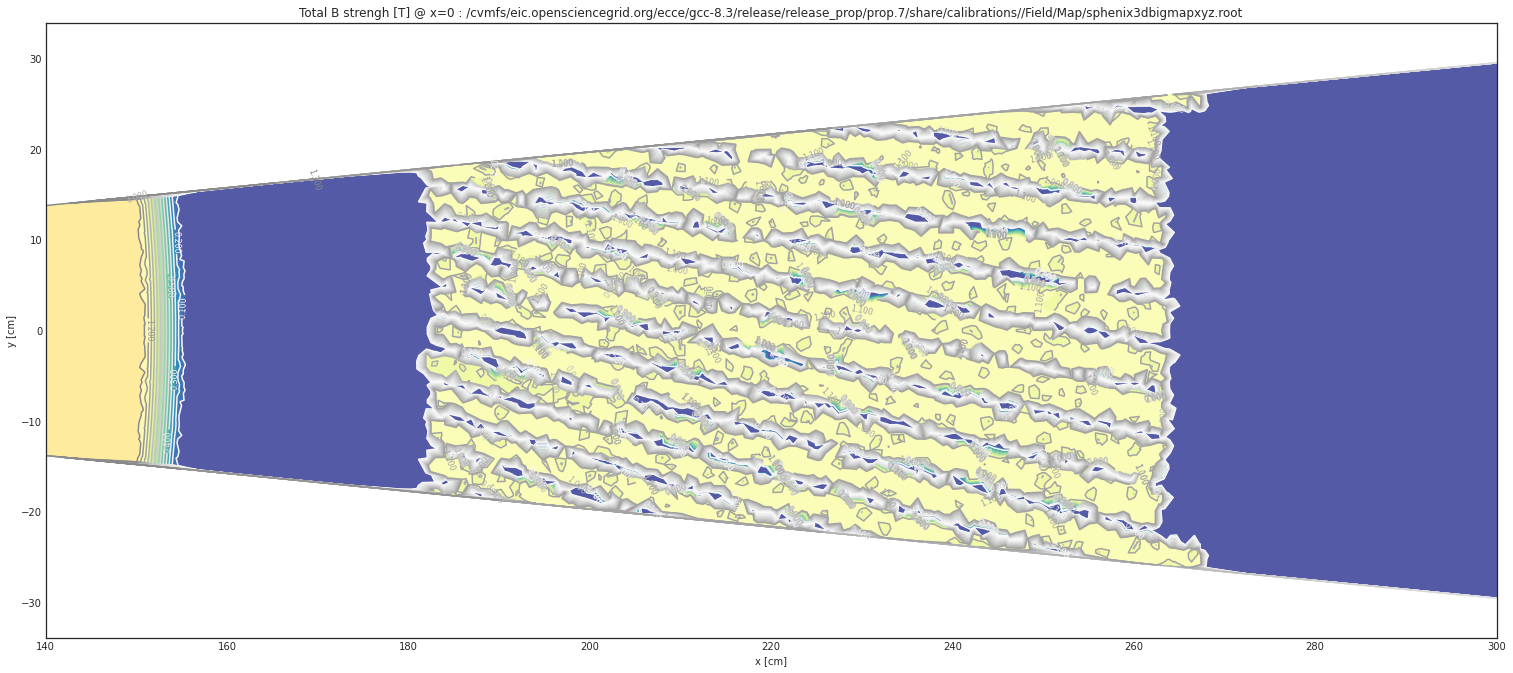

In [29]:
fig, ax = plt.subplots(figsize=(26,16))
ax.set_aspect('equal')
ax.tricontourf(df_fieldmap_xy['X_fold'].values,df_fieldmap_xy['Y_fold'].values,df_fieldmap_xy['B_tot'].values,limits, cmap='Spectral_r') 
contours = ax.tricontour(df_fieldmap_xy['X_fold'].values,df_fieldmap_xy['Y_fold'].values,df_fieldmap_xy['B_tot'].values, limits)
ax.clabel(contours, inline=True, fontsize=8)

ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
ax.set_title("Total B strengh [T] @ x=0 : " + MapFile3D)
ax.set_xlim([140, 300])

fig.show()

In [30]:
df_fieldmap_xy

,x,Y_fold,X_fold,R,phi_fmod,B_tot,y,z,bx,by,bz,hz
165,-270.0,0.000000e+00,381.837662,381.837662,0.000000e+00,0.001269,-270.0,0.0,0.000046,0.000040,-0.001267,-0.001267
496,-270.0,-1.414214e+00,380.423448,380.426077,-3.717455e-03,0.001265,-268.0,0.0,0.000046,0.000040,-0.001263,-0.001263
827,-270.0,-2.828427e+00,379.009235,379.019788,-7.462548e-03,0.001260,-266.0,0.0,0.000047,0.000040,-0.001259,-0.001259
1158,-270.0,-4.242641e+00,377.595021,377.618855,-1.123548e-02,0.001256,-264.0,0.0,0.000047,0.000041,-0.001254,-0.001254
1489,-270.0,-5.656854e+00,376.180808,376.223338,-1.503646e-02,0.001252,-262.0,0.0,0.000048,0.000041,-0.001250,-0.001250
...,...,...,...,...,...,...,...,...,...,...,...,...
24307481,270.0,-5.656854e+00,376.180808,376.223338,-1.503646e-02,0.001262,262.0,0.0,0.000003,-0.000093,-0.001259,-0.001259
24307812,270.0,-4.242641e+00,377.595021,377.618855,-1.123548e-02,0.001266,264.0,0.0,0.000004,-0.000092,-0.001263,-0.001263
24308143,270.0,-2.828427e+00,379.009235,379.019788,-7.462548e-03,0.001270,266.0,0.0,0.000006,-0.000091,-0.001267,-0.001267
24308474,270.0,-1.414214e+00,380.423448,380.426077,-3.717455e-03,0.001274,268.0,0.0,0.000007,-0.000091,-0.001271,-0.001271


The separation of the field in gap (<0.1 T) and in steel (>0.1 T) is very clear 

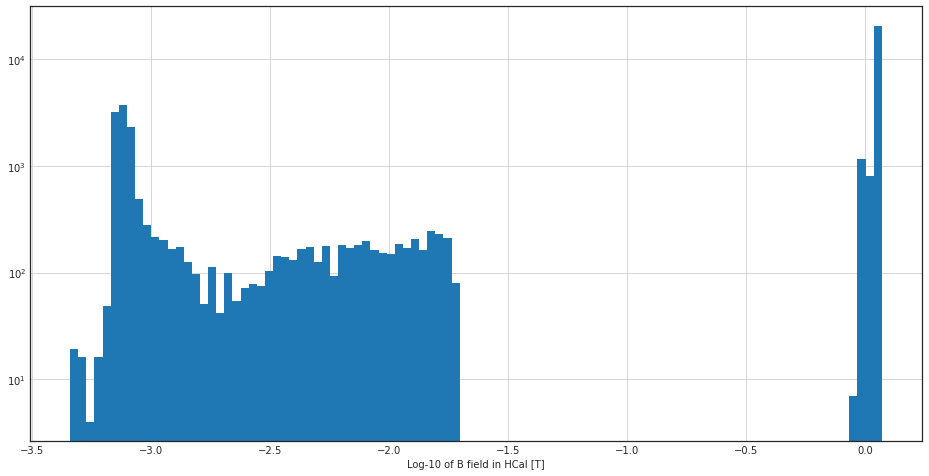

In [31]:
fig, ax = plt.subplots(figsize=(16,8))

hist = df_fieldmap_xy[(df_fieldmap_xy['X_fold'] >=170) & ( df_fieldmap_xy['X_fold'] <=280)].apply(lambda x: np.log10(x['B_tot']), axis=1).hist(bins=100)
ax.set_xlabel('Log-10 of B field in HCal [T]');
ax.set_yscale('log')

Now perform the separation according the field value. We can get two maps, one for in-steel, one outside for one sector. 

In [32]:
df_fieldmap_xy_steel = df_fieldmap_xy[(df_fieldmap_xy['B_tot'] > 0.1)  & (df_fieldmap_xy['X_fold'] >=170) & ( df_fieldmap_xy['X_fold'] <=280)]
df_fieldmap_xy_gap = df_fieldmap_xy[(df_fieldmap_xy['B_tot'] < 0.1)  & (df_fieldmap_xy['X_fold'] >=170) & ( df_fieldmap_xy['X_fold'] <=280)]

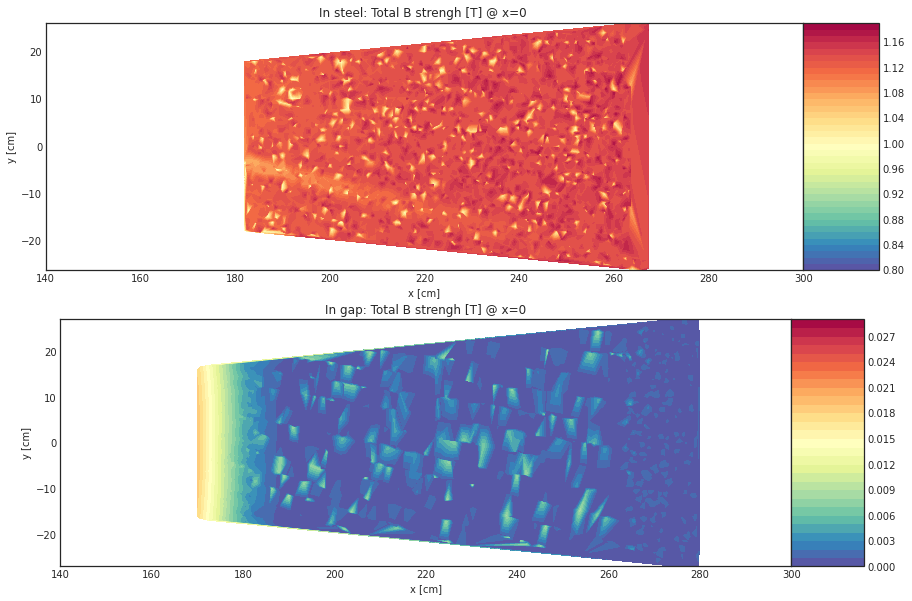

In [33]:
fig, axs = plt.subplots(2, 1, figsize=(26,10))

ax = axs[0];

limits =  np.arange(.8,1.2,.01);
ax.set_aspect('equal')
tcf = ax.tricontourf(df_fieldmap_xy_steel['X_fold'].values,df_fieldmap_xy_steel['Y_fold'].values,df_fieldmap_xy_steel['B_tot'].values,limits, cmap='Spectral_r') 
# contours = ax.tricontour(df_fieldmap_xy_steel['X_fold'].values,df_fieldmap_xy_steel['Y_fold'].values,df_fieldmap_xy_steel['B_tot'].values, limits)
# ax.clabel(contours, inline=True, fontsize=8)
fig.colorbar(tcf, cax=make_axes_locatable(ax).append_axes('right', size='10%', pad=0.00), orientation='vertical')

ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
ax.set_title("In steel: Total B strengh [T] @ x=0 " )
ax.set_xlim([140, 300])

ax = axs[1];

limits =  np.arange(0,.03,.001);
ax.set_aspect('equal')
tcf= ax.tricontourf(df_fieldmap_xy_gap['X_fold'].values,df_fieldmap_xy_gap['Y_fold'].values,df_fieldmap_xy_gap['B_tot'].values,limits, cmap='Spectral_r') 
# contours = ax.tricontour(df_fieldmap_xy_gap['X_fold'].values,df_fieldmap_xy_gap['Y_fold'].values,df_fieldmap_xy_gap['B_tot'].values, limits)
# ax.clabel(contours, inline=True, fontsize=8)
fig.colorbar(tcf, cax=make_axes_locatable(ax).append_axes('right', size='10%', pad=0.00), orientation='vertical')


ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
ax.set_title("In gap: Total B strengh [T] @ x=0")
ax.set_xlim([140, 300])

fig.show()

The field point sampled in the gap between steel fins are there, just relatively rare and random. Given from gap to gap, the field changes smoothly, we can use these information to interpolate and rebuild the field in and out of the steel separately in the next section. 

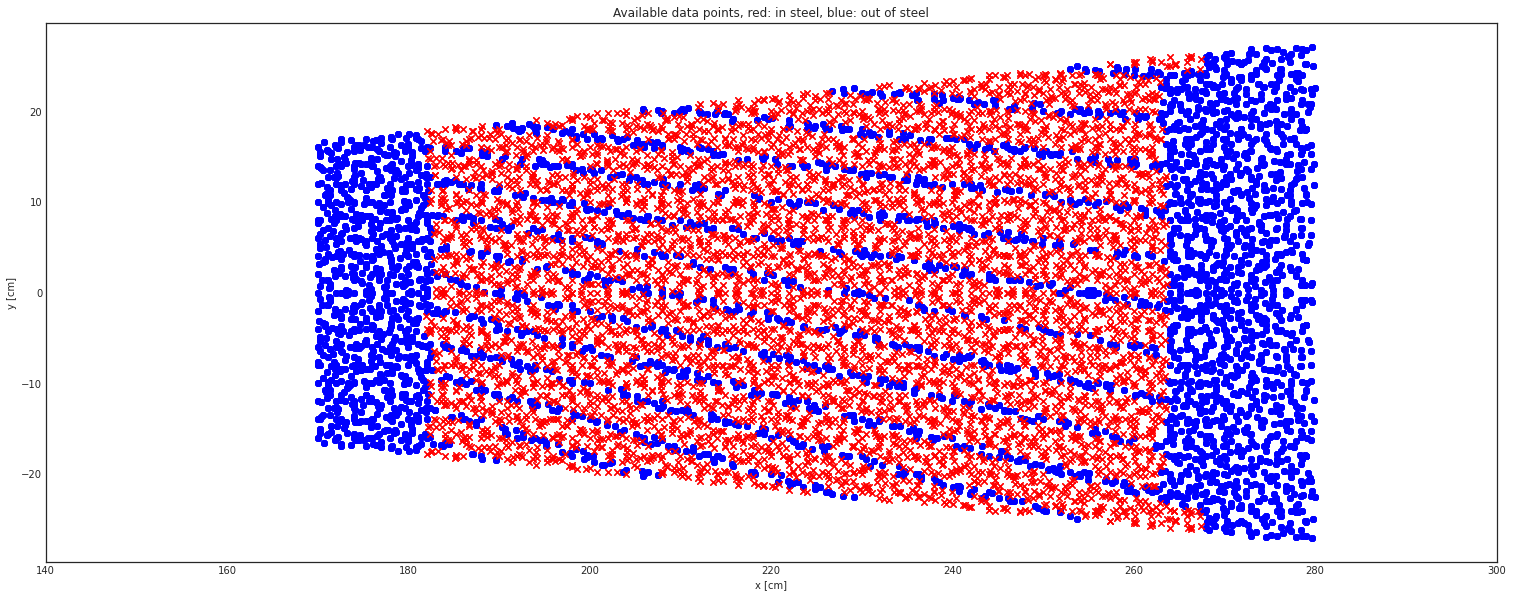

In [34]:
fig, ax = plt.subplots(figsize=(26,16))
ax.set_aspect('equal')
ax.plot(df_fieldmap_xy_gap['X_fold'], df_fieldmap_xy_gap['Y_fold'], 'o', color='blue')
ax.plot(df_fieldmap_xy_steel['X_fold'], df_fieldmap_xy_steel['Y_fold'], 'x', color='red')

ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
ax.set_title("Available data points, red: in steel, blue: out of steel")
ax.set_xlim([140, 300])

fig.show()

## Steel vol.-separated 3D field

In [35]:
# df_fieldmap_central = df_fieldmap[(df_fieldmap['z'] > -10) & (df_fieldmap['z'] < 10)]
df_fieldmap_central = df_fieldmap

In [36]:
# df_fieldmap_central

In [37]:
# # Expensive ops

if not exists('df_fieldmap_steel.hdf5'):

    df_fieldmap_central['R'] = df_fieldmap_central.apply(
        lambda x: np.sqrt(x['x']*x['x'] + x['y']*x['y'])
        , axis=1)

    df_fieldmap_central['In_Steel'] = df_fieldmap_central.apply(
        lambda x: (df_fieldmap_xy[(df_fieldmap_xy['x'] == x['x']) & (df_fieldmap_xy['y'] == x['y'])]['B_tot'].mean() > 0.1) & (x['R'] >=170) & ( x['R'] <=280)
        , axis=1)

    df_fieldmap_steel = df_fieldmap_central[(df_fieldmap_central['In_Steel'])].copy(deep=True)
    df_fieldmap_gap =  df_fieldmap_central[~(df_fieldmap_central['In_Steel'])].copy(deep=True)

    df_fieldmap_steel.to_hdf('df_fieldmap_steel.hdf5', "df_fieldmap_steel");
    df_fieldmap_gap.to_hdf('df_fieldmap_gap.hdf5', "df_fieldmap_gap");


In [38]:
# Load preprocessed results
import uproot
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.style.use('seaborn-white')

import numpy as np

df_fieldmap_steel = pd.read_hdf('df_fieldmap_steel.hdf5', "df_fieldmap_steel");
df_fieldmap_gap= pd.read_hdf('df_fieldmap_gap.hdf5', "df_fieldmap_gap");
df_fieldmap_steel

,x,y,z,bx,by,bz,hz,R,In_Steel
219453,-266.0,-28.0,-330.0,0.000561,-0.000073,-0.097772,-0.097772,267.469635,True
219454,-266.0,-28.0,-328.0,0.000783,-0.000226,-0.098137,-0.098137,267.469635,True
219455,-266.0,-28.0,-326.0,-0.001397,-0.000441,-0.098283,-0.098283,267.469635,True
219456,-266.0,-28.0,-324.0,-0.005068,-0.000932,-0.098778,-0.098778,267.469635,True
219457,-266.0,-28.0,-322.0,-0.009864,-0.001655,-0.101159,-0.101159,267.469635,True
...,...,...,...,...,...,...,...,...,...
24089513,266.0,28.0,322.0,-0.010049,-0.001779,-0.106425,-0.106425,267.469635,True
24089514,266.0,28.0,324.0,-0.005525,-0.001127,-0.103876,-0.103876,267.469635,True
24089515,266.0,28.0,326.0,-0.002021,-0.000704,-0.103339,-0.103339,267.469635,True
24089516,266.0,28.0,328.0,0.000123,-0.000522,-0.103195,-0.103195,267.469635,True


Back to unfolded space, here is the available points in-steel vs out of steel, which is sparsely distributed in the outer HCal

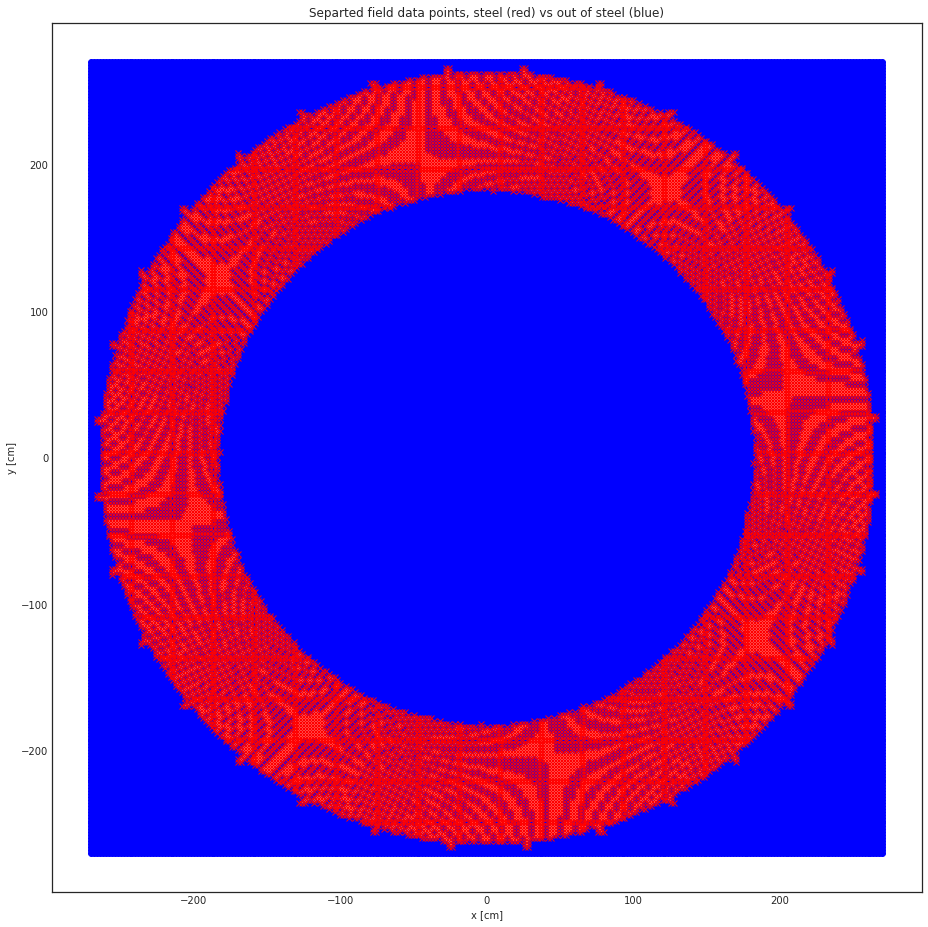

In [39]:
df_fieldmap_xy_gap = df_fieldmap_gap[df_fieldmap_gap['z'] == 0]
df_fieldmap_xy_steel = df_fieldmap_steel[df_fieldmap_steel['z'] == 0]

fig, ax = plt.subplots(figsize=(26,16))
ax.set_aspect('equal')
ax.plot(df_fieldmap_xy_gap['x'], df_fieldmap_xy_gap['y'], 'o', color='blue')
ax.plot(df_fieldmap_xy_steel['x'], df_fieldmap_xy_steel['y'], 'x', color='red')

ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
ax.set_title("Separted field data points, steel (red) vs out of steel (blue)")

fig.show()

Steel separated 3D field at z=0 plane: 

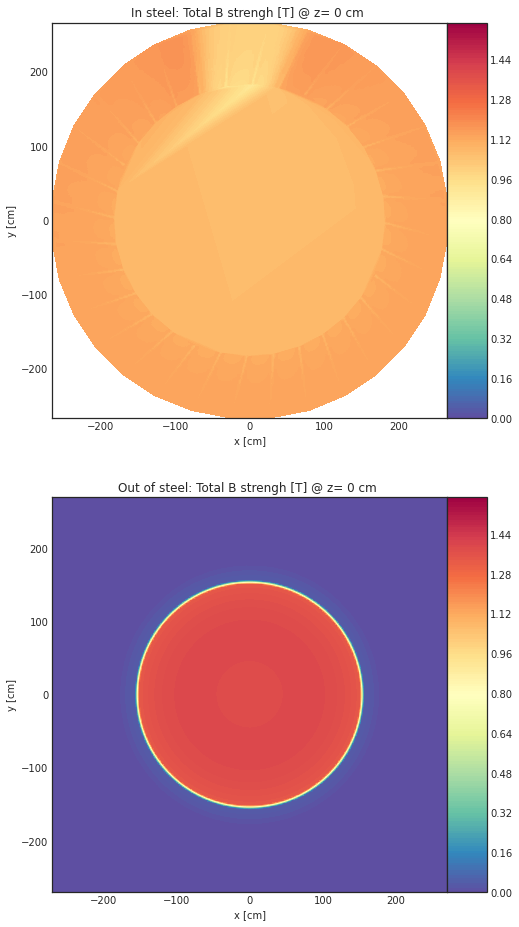

In [40]:
df_fieldmap_xy_gap = df_fieldmap_gap[df_fieldmap_gap['z'] == 0]
df_fieldmap_xy_steel = df_fieldmap_steel[df_fieldmap_steel['z'] ==0]


limits =  np.arange(0,1.6,.01);

fig, axs = plt.subplots(2,1, figsize=(32,16))

ax = axs[0]
ax.set_aspect('equal')
tcf = ax.tricontourf(df_fieldmap_xy_steel['x'].values, df_fieldmap_xy_steel['y'].values, df_fieldmap_xy_steel.apply(lambda x: np.sqrt(x['bx']*x['bx'] + x['by']*x['by'] + x['bz']*x['bz']), axis=1).values,
               limits, cmap='Spectral_r') 
# contours = ax.tricontour(X,Y,Z, limits)
# ax.clabel(contours, inline=True, fontsize=8)
fig.colorbar(tcf, cax=make_axes_locatable(ax).append_axes('right', size='10%', pad=0.00), orientation='vertical')

ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
ax.set_title("In steel: Total B strengh [T] @ z= 0 cm ")


ax = axs[1]
ax.set_aspect('equal')
tcf = ax.tricontourf(df_fieldmap_xy_gap['x'].values, df_fieldmap_xy_gap['y'].values, df_fieldmap_xy_gap.apply(lambda x: np.sqrt(x['bx']*x['bx'] + x['by']*x['by'] + x['bz']*x['bz']), axis=1).values,
               limits, cmap='Spectral_r') 
# contours = ax.tricontour(X,Y,Z, limits)
# ax.clabel(contours, inline=True, fontsize=8)
fig.colorbar(tcf, cax=make_axes_locatable(ax).append_axes('right', size='10%', pad=0.00), orientation='vertical')


ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
ax.set_title("Out of steel: Total B strengh [T] @ z= 0 cm ")

fig.show()

Steel separated 3D field at z=-250 plane, that include the HCal cut off for the magnet chimney. A field irregularity is obvious around the cut off structure. 

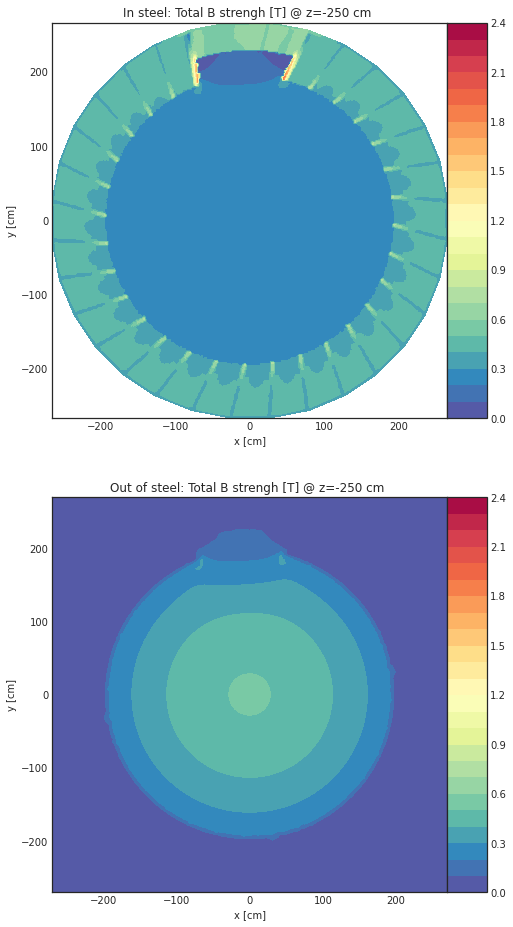

In [41]:
df_fieldmap_xy_gap = df_fieldmap_gap[df_fieldmap_gap['z'] == -250]
df_fieldmap_xy_steel = df_fieldmap_steel[df_fieldmap_steel['z'] == -250]


limits =  np.arange(0,2.5,.1);

fig, axs = plt.subplots(2,1, figsize=(32,16))

ax = axs[0]
ax.set_aspect('equal')
tcf = ax.tricontourf(df_fieldmap_xy_steel['x'].values, df_fieldmap_xy_steel['y'].values, df_fieldmap_xy_steel.apply(lambda x: np.sqrt(x['bx']*x['bx'] + x['by']*x['by'] + x['bz']*x['bz']), axis=1).values,
               limits, cmap='Spectral_r') 
# contours = ax.tricontour(X,Y,Z, limits)
# ax.clabel(contours, inline=True, fontsize=8)
fig.colorbar(tcf, cax=make_axes_locatable(ax).append_axes('right', size='10%', pad=0.00), orientation='vertical')

ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
ax.set_title("In steel: Total B strengh [T] @ z=-250 cm ")


ax = axs[1]
ax.set_aspect('equal')
tcf = ax.tricontourf(df_fieldmap_xy_gap['x'].values, df_fieldmap_xy_gap['y'].values, df_fieldmap_xy_gap.apply(lambda x: np.sqrt(x['bx']*x['bx'] + x['by']*x['by'] + x['bz']*x['bz']), axis=1).values,
               limits, cmap='Spectral_r') 
# contours = ax.tricontour(X,Y,Z, limits)
# ax.clabel(contours, inline=True, fontsize=8)
fig.colorbar(tcf, cax=make_axes_locatable(ax).append_axes('right', size='10%', pad=0.00), orientation='vertical')


ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
ax.set_title("Out of steel: Total B strengh [T] @ z=-250 cm ")

fig.show()

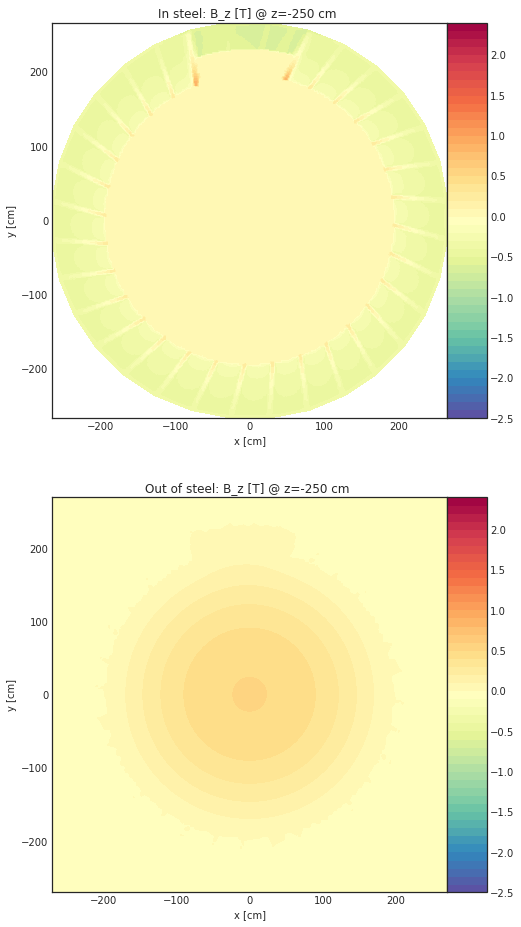

In [42]:
df_fieldmap_xy_gap = df_fieldmap_gap[df_fieldmap_gap['z'] == -250]
df_fieldmap_xy_steel = df_fieldmap_steel[df_fieldmap_steel['z'] == -250]


limits =  np.arange(-2.5,2.5,.1);

fig, axs = plt.subplots(2,1, figsize=(32,16))

ax = axs[0]
ax.set_aspect('equal')
tcf = ax.tricontourf(df_fieldmap_xy_steel['x'].values, df_fieldmap_xy_steel['y'].values,  df_fieldmap_xy_steel['bz'].values,
               limits, cmap='Spectral_r') 
# contours = ax.tricontour(X,Y,Z, limits)
# ax.clabel(contours, inline=True, fontsize=8)
fig.colorbar(tcf, cax=make_axes_locatable(ax).append_axes('right', size='10%', pad=0.00), orientation='vertical')

ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
ax.set_title("In steel: B_z [T] @ z=-250 cm ")


ax = axs[1]
ax.set_aspect('equal')
tcf = ax.tricontourf(df_fieldmap_xy_gap['x'].values, df_fieldmap_xy_gap['y'].values,  df_fieldmap_xy_gap['bz'].values,
               limits, cmap='Spectral_r') 
# contours = ax.tricontour(X,Y,Z, limits)
# ax.clabel(contours, inline=True, fontsize=8)
fig.colorbar(tcf, cax=make_axes_locatable(ax).append_axes('right', size='10%', pad=0.00), orientation='vertical')


ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
ax.set_title("Out of steel: B_z [T] @ z=-250 cm ")

fig.show()

# Rebuild map with in/out steel separation

Now the rebuilding part to make two 3D field map, one for gap and one for steel vols in Geant4. It is OK if the simulation has a small geometry offset from the field calculation, as the field for each of these two types of volumns are mostly continous function through the 3D space. Then we can rely on Geant4 vol tracking to determine the volumn boundary. 

We use a 3D linear interpolation to map out the field in gap and steel separately with `scipy.interpolate.griddata`. One trick to speed up calculation is to interpolate at the same z-grid as the original field map (2cm grid), then the interpolation become 2D problem at each z-plane independently. 

In [43]:
df_fieldmap_steel_rebuild = pd.DataFrame({"x":[] , "y":[] , "z":[] , "bx":[] , "by":[] , "bz":[] , })
df_fieldmap_gap_rebuild = df_fieldmap_steel_rebuild.copy()


In [44]:
# expensive operation

from scipy.interpolate import griddata as griddata

if not exists('df_fieldmap_steel_rebuild.hdf5'):
    
    zs = df_fieldmap.z.unique()

    for z in zs:
    # for z in [0]: 
        print(f"processing z = {z}")

        df_fieldmap_zselect =  df_fieldmap[df_fieldmap['z'] == z]
        df_fieldmap_steel_zselect =  df_fieldmap_steel[df_fieldmap_steel['z'] == z]
        df_fieldmap_gap_zselect =  df_fieldmap_gap[df_fieldmap_gap['z'] == z]

        df_fieldmap_steel_rebuild_zselect = pd.DataFrame({"x":df_fieldmap_zselect.x 
                          , "y":df_fieldmap_zselect.y 
                          , "z":df_fieldmap_zselect.z 
                          , "bx":np.nan_to_num(griddata((df_fieldmap_steel_zselect.x,df_fieldmap_steel_zselect.y)
                              , df_fieldmap_steel_zselect.bx, 
                              (df_fieldmap_zselect.x.array, df_fieldmap_zselect.y.array)
                              , method='linear')) 
                          , "by":np.nan_to_num(griddata((df_fieldmap_steel_zselect.x,df_fieldmap_steel_zselect.y)
                              , df_fieldmap_steel_zselect.by, 
                              (df_fieldmap_zselect.x.array, df_fieldmap_zselect.y.array)
                              , method='linear')) 
                          , "bz":np.nan_to_num(griddata((df_fieldmap_steel_zselect.x,df_fieldmap_steel_zselect.y)
                              , df_fieldmap_steel_zselect.bz, 
                              (df_fieldmap_zselect.x.array, df_fieldmap_zselect.y.array)
                              , method='linear'))
                          , })
        df_fieldmap_steel_rebuild = df_fieldmap_steel_rebuild.append(df_fieldmap_steel_rebuild_zselect)


        df_fieldmap_gap_rebuild_zselect = pd.DataFrame({"x":df_fieldmap_zselect.x 
                          , "y":df_fieldmap_zselect.y 
                          , "z":df_fieldmap_zselect.z 
                          , "bx":np.nan_to_num(griddata((df_fieldmap_gap_zselect.x,df_fieldmap_gap_zselect.y)
                              , df_fieldmap_gap_zselect.bx, 
                              (df_fieldmap_zselect.x.array, df_fieldmap_zselect.y.array)
                              , method='linear')) 
                          , "by":np.nan_to_num(griddata((df_fieldmap_gap_zselect.x,df_fieldmap_gap_zselect.y)
                              , df_fieldmap_gap_zselect.by, 
                              (df_fieldmap_zselect.x.array, df_fieldmap_zselect.y.array)
                              , method='linear')) 
                          , "bz":np.nan_to_num(griddata((df_fieldmap_gap_zselect.x,df_fieldmap_gap_zselect.y)
                              , df_fieldmap_gap_zselect.bz, 
                              (df_fieldmap_zselect.x.array, df_fieldmap_zselect.y.array)
                              , method='linear'))
                          , })
        df_fieldmap_gap_rebuild = df_fieldmap_gap_rebuild.append(df_fieldmap_gap_rebuild_zselect)


    df_fieldmap_steel_rebuild.to_hdf('df_fieldmap_steel_rebuild.hdf5', "df_fieldmap_steel_rebuild");
    df_fieldmap_gap_rebuild.to_hdf('df_fieldmap_gap_rebuild.hdf5', "df_fieldmap_gap_rebuild");

In [45]:
df_fieldmap_steel_rebuild = pd.read_hdf('df_fieldmap_steel_rebuild.hdf5', "df_fieldmap_steel_rebuild");
df_fieldmap_gap_rebuild = pd.read_hdf('df_fieldmap_gap_rebuild.hdf5', "df_fieldmap_gap_rebuild");

Here is quick check plot for a given $z$ plane for the set of two field map

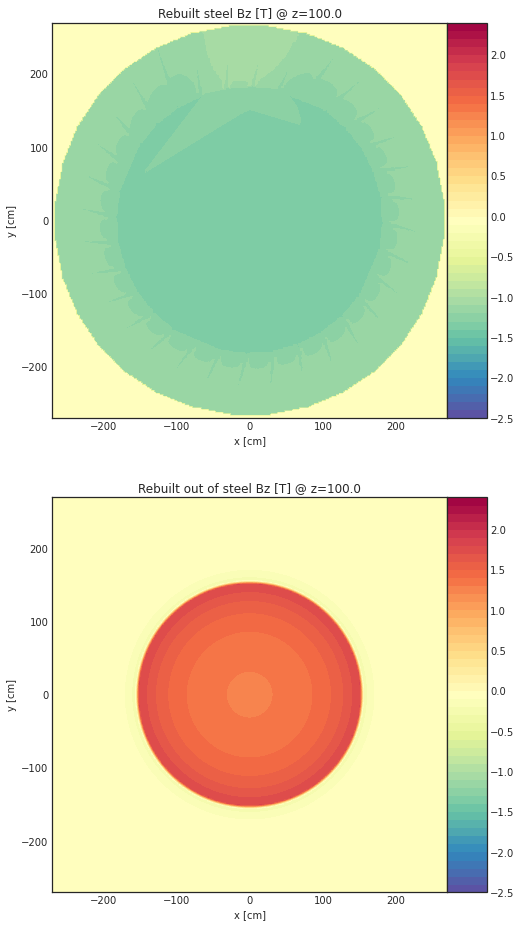

In [46]:
limits =  np.arange(0-2.5,2.5,.1);

df_fieldmap_steel_zselect = df_fieldmap_steel_rebuild[df_fieldmap_steel_rebuild['z'] == 100]
df_fieldmap_gap_rebuild_zselect = df_fieldmap_gap_rebuild[df_fieldmap_gap_rebuild['z'] == 100]

fig, axs = plt.subplots(2,1,figsize=(32,16))

ax = axs[0]
ax.set_aspect('equal')
tcf = ax.tricontourf(
    df_fieldmap_steel_zselect['x'].values
    ,df_fieldmap_steel_zselect['y'].values
    ,df_fieldmap_steel_zselect['bz'].values
    ,limits, cmap='Spectral_r') 
fig.colorbar(tcf, cax=make_axes_locatable(ax).append_axes('right', size='10%', pad=0.00), orientation='vertical')


ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
ax.set_title(f"Rebuilt steel Bz [T] @ z={df_fieldmap_steel_zselect.z.iloc[0]}")

ax = axs[1]
ax.set_aspect('equal')
tcf = ax.tricontourf(
    df_fieldmap_gap_rebuild_zselect['x'].values
    ,df_fieldmap_gap_rebuild_zselect['y'].values
    ,df_fieldmap_gap_rebuild_zselect['bz'].values
    ,limits, cmap='Spectral_r') 
fig.colorbar(tcf, cax=make_axes_locatable(ax).append_axes('right', size='10%', pad=0.00), orientation='vertical')


ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
ax.set_title(f"Rebuilt out of steel Bz [T] @ z={df_fieldmap_gap_rebuild_zselect.z.iloc[0]}")

fig.show()

Output to field map in the ROOT file format

In [47]:

if not exists('sphenix3dbigmapxyz_gap_rebuild.root'):
    TFile_fieldmap_gap_rebuild = ROOT.TFile.Open("sphenix3dbigmapxyz_gap_rebuild.root","recreate")
    TNtuple_fieldmap_gap_rebuild = ROOT.TNtuple("fieldmap"
                                              , "Rebuilt field map out side the HCal steel vol."
                                             , "x:y:z:bx:by:bz")

    counter = 0
    for index, row in df_fieldmap_gap_rebuild.iterrows():
        if counter % 100000 == 0:
            print(f"Processing {counter}")
        counter = counter + 1

        TNtuple_fieldmap_gap_rebuild.Fill(row.x, row.y, row.z, row.bx, row.by, row.bz)

    TFile_fieldmap_gap_rebuild.Write()

In [48]:
TFile_fieldmap_gap_rebuild = ROOT.TFile.Open("sphenix3dbigmapxyz_gap_rebuild.root")

display(Markdown(f"`{TFile_fieldmap_gap_rebuild.GetName()}` contains {TFile_fieldmap_gap_rebuild.fieldmap.GetEntries()} records. First record:"))
TFile_fieldmap_gap_rebuild.fieldmap.Show(0)

`sphenix3dbigmapxyz_gap_rebuild.root` contains 24308971 records. First record:

======> EVENT:0
 x               = -270
 y               = -270
 z               = -330
 bx              = 0.00143383
 by              = 0.00143013
 bz              = -0.00276163


In [49]:

if not exists('sphenix3dbigmapxyz_steel_rebuild.root'):

    TFile_fieldmap_steel_rebuild = ROOT.TFile.Open("sphenix3dbigmapxyz_steel_rebuild.root","recreate")
    TNtuple_fieldmap_steel_rebuild = ROOT.TNtuple("fieldmap"
                                              , "Rebuilt field map out side the HCal steel vol."
                                             , "x:y:z:bx:by:bz")

    counter = 0
    for index, row in df_fieldmap_steel_rebuild.iterrows():
        if counter % 100000 == 0:
            print(f"Processing {counter}")
        counter = counter + 1

        TNtuple_fieldmap_steel_rebuild.Fill(row.x, row.y, row.z, row.bx, row.by, row.bz)

    TFile_fieldmap_steel_rebuild.Write()

In [50]:
TFile_fieldmap_steel_rebuild = ROOT.TFile.Open("sphenix3dbigmapxyz_steel_rebuild.root")

display(Markdown(f"`{TFile_fieldmap_steel_rebuild.GetName()}` contains {TFile_fieldmap_steel_rebuild.fieldmap.GetEntries()} records. 10000000th record:"))
TFile_fieldmap_steel_rebuild.fieldmap.Show(10000000)

`sphenix3dbigmapxyz_steel_rebuild.root` contains 24308971 records. 10000000th record:

======> EVENT:10000000
 x               = -182
 y               = -70
 z               = -58
 bx              = -0.121009
 by              = -0.0158671
 bz              = -1.17068
